In [1]:
pip install pydlm

     |████████████████████████████████| 46 kB 1.7 MB/s 
  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=58995 sha256=90348543206b27748cb3b49b57f009bb2ac9f59d386f0cd55d92bbf300438537
  Stored in directory: /root/.cache/pip/wheels/1d/fb/0c/6611fce0b9f3611ac6498dbddb7a9b5e67c09684acf6db285d
Successfully built pydlm


NameError: ignored

In [7]:
from pydlm import dlm, trend, seasonality
import pandas  as pd
import numpy as np

In [8]:
df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/input.xlsx')
df.head()

,Date,SalesVolume
0,1995-01-01,47639
1,1995-02-01,47880
2,1995-03-01,67025
3,1995-04-01,56925
4,1995-05-01,64192


In [25]:
df.tail()

,Date,SalesVolume
315,2021-04-01,66565
316,2021-05-01,56135
317,2021-06-01,103085
318,2021-07-01,21935
319,2021-08-01,26661


In [3]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)

In [10]:
# A seasonality
seasonal52 = seasonality(period=12, discount=0.99, name='seasonal52', w=10)

In [15]:
# Build a simple dlm
simple_dlm = dlm(df['SalesVolume']) + linear_trend + seasonal52

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


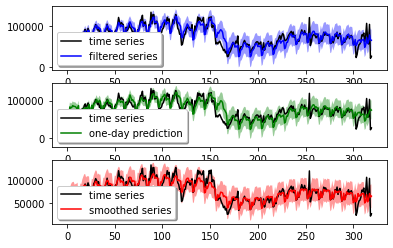

In [16]:
# Fit the model
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [17]:
simple_dlm.getMSE()

203138238.61009836

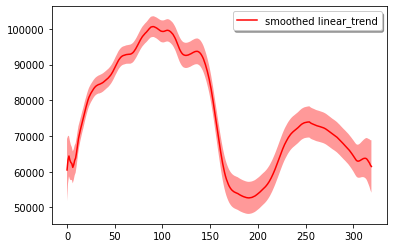

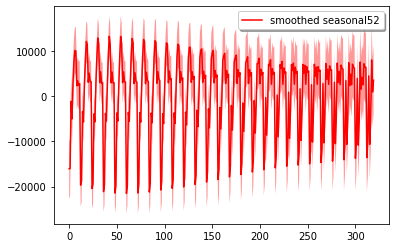

In [18]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

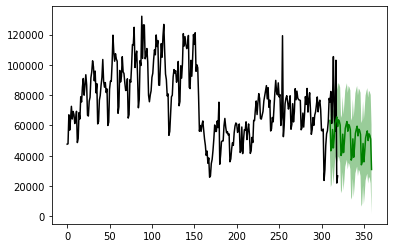

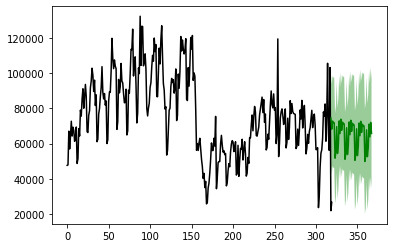

In [26]:
# Plot the prediction give the first 351 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=310, N=50)
# Plot the prediction give the first 251 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=318, N=50)